# Lorenz 96 model


This script solves the Lorenz 96 model, a dynamical system which exhibits chaotic behaviour for the forcing term $F = 8$. The model is stated as follows:

$$ \frac{dx_{i}}{dt} = (x_{i+1} - x_{i-2})x_{i-1} - x_{i} + F $$

For $i = 1, 2, ..., N$, and where it is assumed that:

$$x_{-1} = x_{N-1} $$
$$x_{0} = x_{N} $$
$$x_{N+1} = x_{1} $$

i.e.

$$ x_{i+N} = x_{i} $$ 

<Figure size 432x288 with 0 Axes>

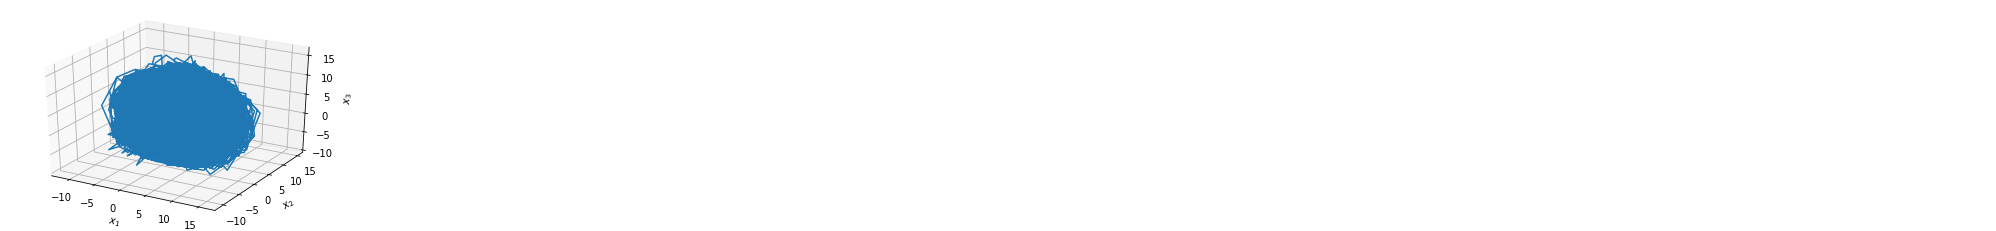

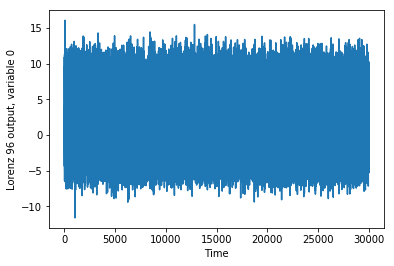

In [5]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np



# these are our constants
N = 36  # number of variables
F = 8  # forcing

def Lorenz96(x,t):
    
  # compute state derivatives
  d = np.zeros(N)
  # first the 3 edge cases: i=1,2,N
  d[0] = (x[1] - x[N-2]) * x[N-1] - x[0]
  d[1] = (x[2] - x[N-1]) * x[0]- x[1]
  d[N-1] = (x[0] - x[N-3]) * x[N-2] - x[N-1]
  # then the general case
  for i in range(2, N-1):
      d[i] = (x[i+1] - x[i-2]) * x[i-1] - x[i]
  # add the forcing term
  d = d + F

  # return the state derivatives
  return d

x0 = np.ones(N) # initial state (equilibrium) 
x0[14] += 0.00000000001 # add small perturbation to 20th variable
t = np.arange(0.0, 30000.0, 0.1)

x = odeint(Lorenz96, x0, t)

# plot first three variables
from mpl_toolkits.mplot3d import Axes3D
plt.figure()
ax = plt.figure().gca(projection='3d')
ax.plot(x[:,0],x[:,1],x[:,2])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.figure()
plt.plot(t, x[:,0])
plt.xlabel('Time')
plt.ylabel('Lorenz 96 output, variable 0')
plt.show()